## Content



- **Case Study Intro**
 - PCA Visualization
- **DBSCAN Algo**
 - Understanding steps involved in DBSCAN
 - Core, Boarder and Noise points
 - eps, min_num_pts

- **Hyperparam tuning**
 - Adjusting Eps and min_num_pts

- **Implementing DBSCAN**
 - Qualitative Metric: PCA Clusters formation
 - Quantative Metric: Dunn Index, Silhouette Score
 - Run time Complexity with previous clustering algo

- **Time Complexity**
 - Comparing with Kmeans, Heirarichal and GMM clustering algo


- **Advantages & Disadvantages of DBSCAN**


## Case Study: Amazon Customer Data with DBSCAN



In today's lecture, we'll try to segment customers based on 'Amazon Customers Data' which we have already seen in the previous few lectures


In [ ]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-04-09 04:35:45--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 108.177.97.139, 108.177.97.102, 108.177.97.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-04-09 04:35:46--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s   

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.drop('ID',axis=1,inplace=True)

Standardizing only the numerical features

In [ ]:
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
std_df = pd.DataFrame(std_df,columns=df.columns)

std_df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906


### PCA-Visualizing the data in 2D

Converting our data using PCA for visualizing in 2D
#### Let's plot two features data now:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components = pca.fit_transform(std_df)

x = components[:,0]
y = components[:,1]

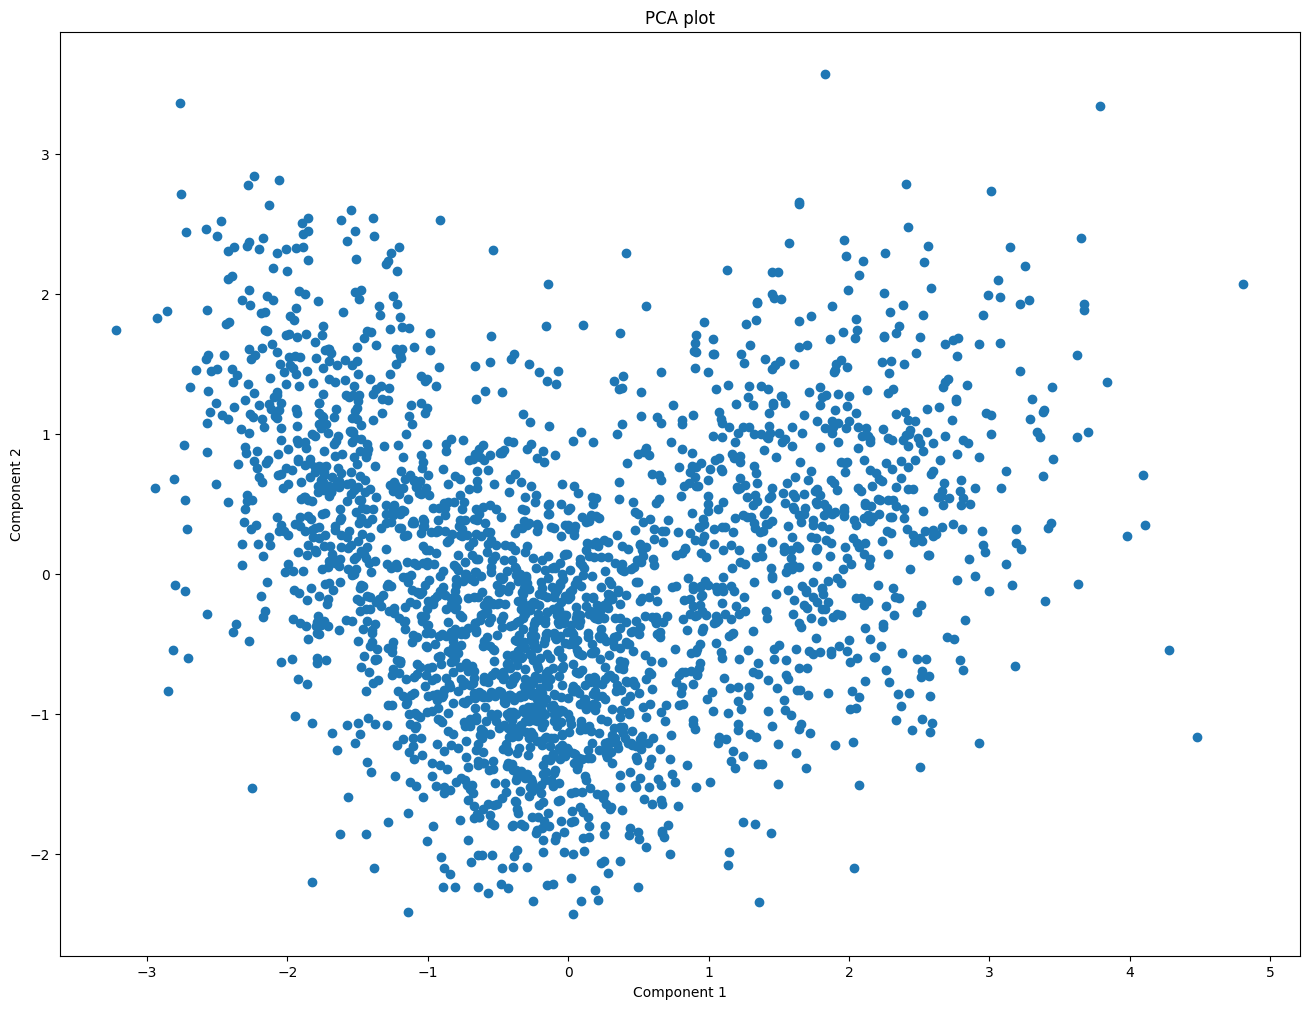

In [ ]:
plt.scatter(x,y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA plot")
plt.show()

**Q. Can you point out some problems that the clustering algorithms that we've learned till now might face?**

- We can easily see the data points that are far away from rest of the data points.

- Well, those are our **outlier** data points.



## DBSCAN - Density-based spatial clustering


<FONT color=red>Instructor Note:</FONT>

Images of DBSCAN shown in the lecture can be found here: https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

Alternative link: https://drive.google.com/file/d/1ok4aGA1AZna3XyodOrLO8DYbZImpI7l9/view?usp=sharing

DBSCAN refers to Density-based spatial clustering of application with noise/outliers



#### What does Density-based spatial clustering of application with noise mean ?

Lets understand this, by getting an intuition on how DBSCAN actually works


Assume we have the following data with noise/outliers

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/889/original/Screenshot_2024-04-02_at_6.05.28_PM.png?1712061420 width=800>

**Step1:**Select a Random Point and draw a circle around it with radii = eps = $r$

#### How to select eps ($r$) ?
Ans: Its the kth distance of the k Nearest Neighbor

<br>

For our example, we pick $x_2$ as our random point

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/890/original/Screenshot_2024-04-02_at_6.05.31_PM.png?1712061455 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/891/original/Screenshot_2024-04-02_at_6.05.37_PM.png?1712061488 width=800>

#### Is the point $x_2$ relevant ? - Defining Core Point

In order for our $x_2$ point with radius = epsilon(eps) = $r$ to be a relevant point for a cluster,
- Its necessary that our point $x_2$ has a **dense region**, meaning it should have **some number of datapoints $\geq$ to a threshold**

<br>

We define this threshold as:
- The minimum number of points **(min_num_pts)** which should be  inside the cricle of eps = $r$

<br>

For our example lets define min_num_pts = 5


#### Will $x_2$ be considered relevant ?

Ans: Yes, since the number of points in $x_2 > 5$.

**Note:** We call these points where the circle contains number of datapoints $\geq$ min_num_pts as **Core Points**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/892/original/Screenshot_2024-04-02_at_6.05.41_PM.png?1712061525 width=800>

**Step2:** Check if the point is core point or not,
- if the point is a core point, include the point in the same cluster


#### What happens to the points where #datapoint$<$min_num_pts ?

Suppose we consider $x_3$ as a randomly selected point inside the circle of $x_2$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/893/original/Screenshot_2024-04-02_at_6.05.46_PM.png?1712061551 width=800>

**Observe**
- Number of datapoints for the $x_3$ circle $<$ min_num_pts(5)

Hence we can say --> $x_3$ is not a core point.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/894/original/Screenshot_2024-04-02_at_6.05.50_PM.png?1712061582 width=800>

#### Can we still say, $x_3$ is not a relevant point ?
Ans: No, since $x_2$(which is a Core Point) is inside the $x_3$ circle
- Hence we can conclude --> $x_3$ is relevant to the cluster of $x_2$, therefore we call $x_3$ as Boarder Point


<br>

**Note:** A point which is not a core point, but contains atleast one Core Point inside its circle is called **Boarder Point**


**Step3:** Choose a point inside the circle of the previously selected random point.
- And check if it is a core point or not,
 - if the point is a core point--> include in the same cluster as the previously selected random point
 - if not a core point --> check for boarder point. And if so, then include in the same cluster as previously selected random point



**Step4:** Repeat step2 and step3 till there is no point inside the circle:
- which is not a core point and not a boarder point
- or it has not been assigned cluster yet


Imagine after some iteration, the data looks like:

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/895/original/Screenshot_2024-04-02_at_6.06.02_PM.png?1712061607 width=800>

**Step5:** From the remaining points which are unassigned a cluster, randomly choose one of them



#### Suppose the algorithm randomly picks $x_{22}$, Will $x_{22}$ be a core point ?
Ans: NO, For $x_{22}$ the no. of datapoints $\leq$ min_num_pts

<br>

#### Is $x_{22}$ a boarder point ?
Ans: NO, For $x_{22}$ , no point inside its circle is a core point

#### What can we say about $x_{22}$ point - relevant or irrelavant ?
Ans: It will be an irelevant point/ noise hence its called a noise point.

**Note** Since $x_{22}$ is a noise point, it will be ignored and have a cluster label =  -1

Has every  point be covered by DBSCAN ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/896/original/Screenshot_2024-04-02_at_6.06.06_PM.png?1712061645 width=800>

Ans: No, hence

**Step6**: Repeat steps 2,3 and 4

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/897/original/Screenshot_2024-04-02_at_6.06.11_PM.png?1712061670 width=800>



**step7**: Repeat steps 5 and 6 until all the points have been assigned

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/898/original/Screenshot_2024-04-02_at_6.06.16_PM.png?1712061703 width=800>

## DBSCAN Algo - Summary

#### Key Ideas behind DBSCAN
1. Min points
2. Eps (epsilon)
3. core-point
4. border-point
5. noise-point

#### Major Steps:

1. Select a Random Point and draw a circle around it with radii = eps = 𝑟
2. Check if the point is core point or not,
  - if the point is a core point, include the point in the same cluster
3. Choose a point inside the circle of the previously selected random point
 - And check if it is a core point or not,
    - if the point is a core point--> include in the same cluster as the previously selected random point
    - if not a core point --> check for boarder point. And if so, then include in the same cluster as previously selected random point

4. Repeat step2 and step3 till there is no point inside the circle.
 - which is not a core point and not a boarder point
 - or it has not been assigned cluster yet

5. From the remaining points which are unassigned a cluster, randomly choose one of them

6. Repeat steps 2,3 and 4
7. Repeat steps 5 and 6 until all the points have been assigned


## Hyperparameter Tuning



> Play around with Min_Pts and Eps value with different distributions.

Link: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

**Q. So, we studied how DBSCAN works. What now? One thing that you can question about is that what should be the ideal values of $minpts$ and $eps$?**

 Let's find that out

### **Adjusting Min Points**

1.  So there are some rules of thumb that people have made over the past years, which typically works well. They are:
  - value of $minpts$ should be greater than or equal to $d+1$; where $d$ is dimensionality of the data
  - lot of libraries use the value of $minpts$ approximately equal to $2 * d$

The points mentioned above are typically rules of thumb and these are used because they tend to work fairly good in most of the cases

2. Given an epsilon value, if the dataset is noisy, we pick larger $minpts$

<img src='https://drive.google.com/uc?id=1GG8CsjKWMsfonj35rfxUbpHpc-L6f9QF'>

### **Adjusting Epsilon Value**

> Q. **Now**, how to tune $eps$ value?

Let's assume we've fixed the value of $minpts = 4$.

Then, we'll perfrom a bunch of steps:

 - Step 1:
  - for every point $x_{i}$ in dataset, we compute a distance $d_{i}$.
  - $d_{i}$ refers to the distance from $x_{i}$ to $x_{i}$'s 4$^{th}$ nearest neighbor (because we've set $minpts$ = 4)

- Step 2:
  - Sort the values of $d_{i}$'s and plot them. You'll notice that the distance will increase graudally and then suddenlly, at a certain point, the value of distance will get boosted
  - So, the index at which the value of $d_{i}$ distance got boosted will be used as the value of $eps$
  - The indices having higher values of $d_{i}$'s will be outliers

<img src='https://drive.google.com/uc?id=1kkZ5b-CQCqUt6PyCTwIHap7EiDNZPfM1'>
<img src='https://drive.google.com/uc?id=1p2h31o66gwI63omdbqulKl2rht8K6z3T'>

***

## DBSCAN Implementation




- The beauty of using DBSCAN is that it can separate outliers (noise points) as well as it can perform clustering (core and border points).

- In this case study, we'll see an example of how DBSCAN can perform clustering in the presense of outliers in data.

#### **How do we do Customer Grouping (Segmentation) if our customers are arbitrarily distributed with outliers in the data?**

- That is, some customers (data points) act as outliers in the data.

- In order to understand this, we'll use a Wholesale Customer Data.


#### **Goal**
- For our case, with DBSCAN, we want to identify this main cluster of customers.
- But we also want to flag customers with more unusual annual purchasing habits.

#### **Fit and Transform using DBSCAN**

In [ ]:
import time

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
start = time.time()
dbsc = DBSCAN(eps = 1.0, min_samples = 12).fit(std_df)
end = time.time()

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0, -1, ...,  0,  0,  0])

In [ ]:
out_df = std_df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

label
 0    1981
-1     514
 1       5
Name: count, dtype: int64

Qualitative Metrics

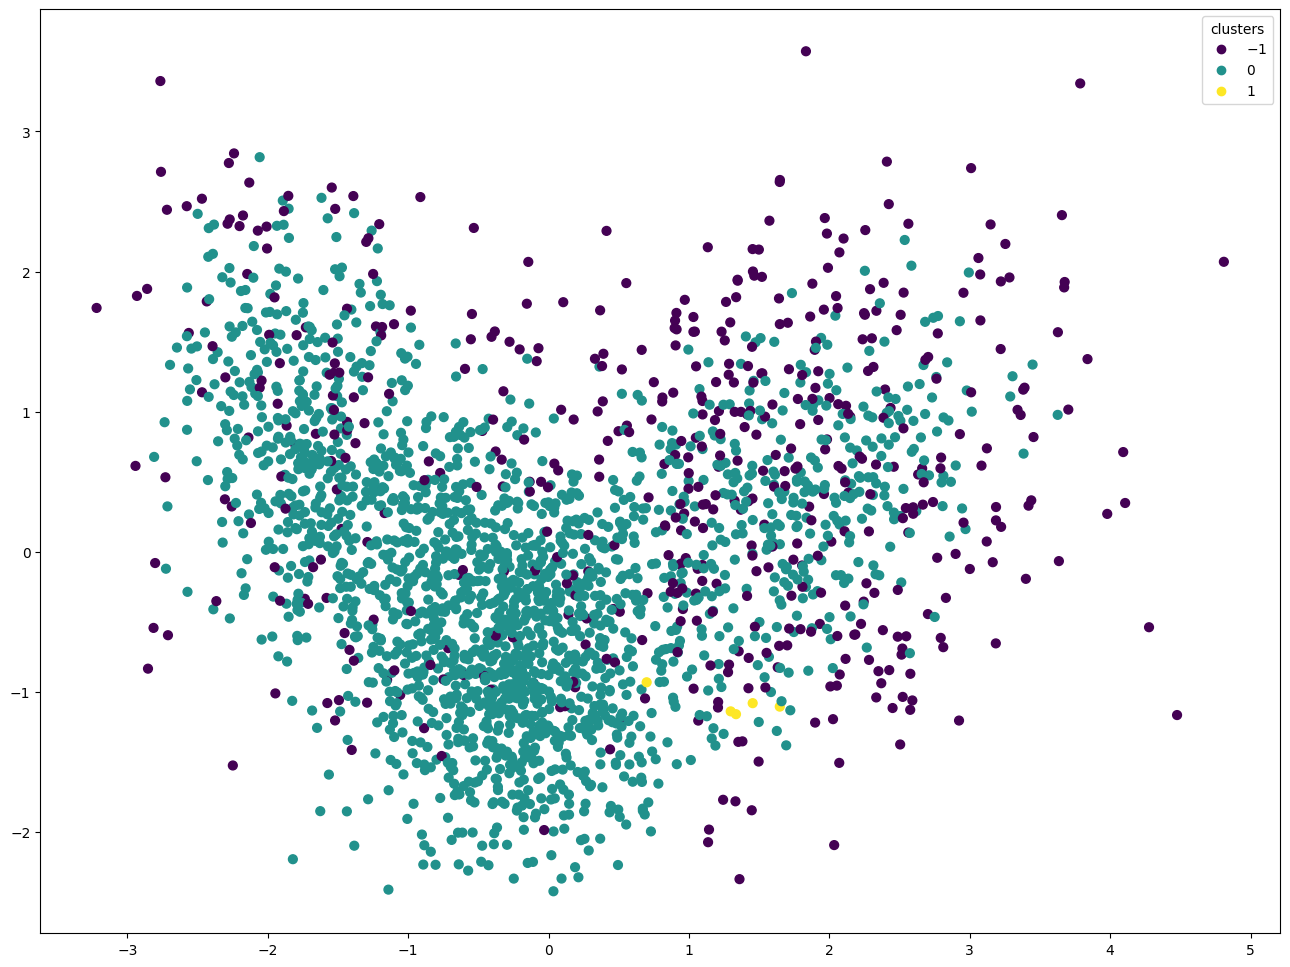

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(x,y,s=40,c=out_df['label'],cmap='viridis')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(std_df)

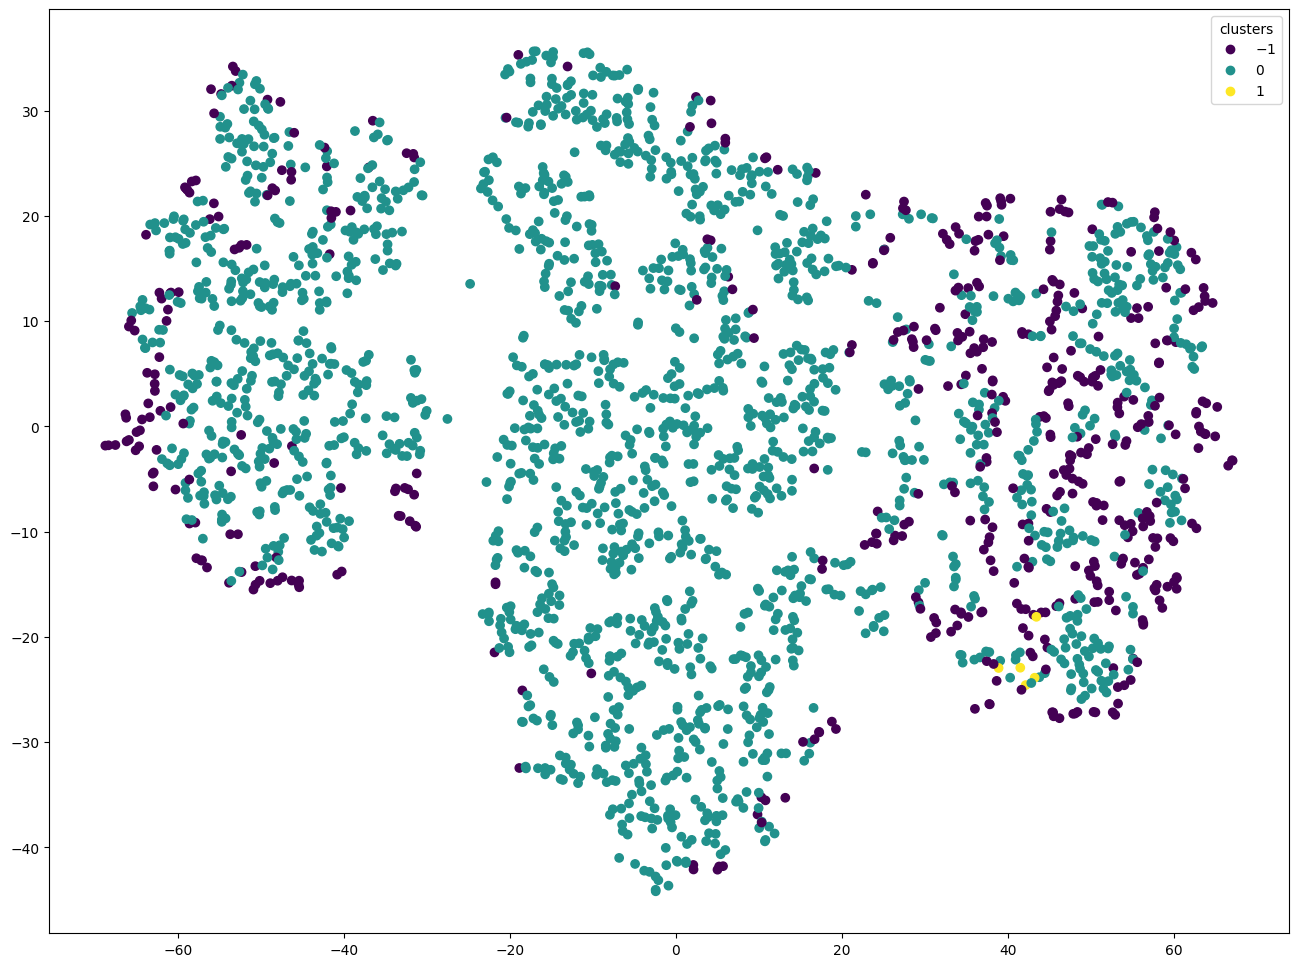

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=out_df['label'],cmap='viridis')
ax.legend(*sc.legend_elements(), title='clusters')

Quantative Metrics

In [ ]:
from sklearn.metrics import davies_bouldin_score as dunn_index

In [ ]:
print('Dunn Index for DBSCAN:',dunn_index(std_df,dbsc.labels_))

Dunn Index for DBSCAN: 2.97292858543806


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print('Silhouette Score for DBSCAN:',silhouette_score(std_df,dbsc.labels_))

Silhouette Score for DBSCAN: 0.006039515119794661


In [ ]:
print("Time taken by DBSCAN:",end-start)

Time taken by DBSCAN: 0.051175832748413086


### **Comparing Time taken to run with other Clustering Algorithm**

|Model|Time Complexity|
|:--|:--|
|Kmeans| |
|Heirarichal Clustering| |
|GMM Clustering| |
|DBScan| 0.05118|

#### **What insights can we draw from here?**

- Outliers are easily detected using DBSCAN, which can either be the premium segment customers, or they can just be customers with abnormal purchases.

- Most of the customers share the same behaviour (404 out of 440).

## Time Complexity

#### **Step 1**

- For each point $x_{i}$ that belongs to the dataset $D$, label it as either core point, border point, or noise point.

How can this be done?
- We can do this by using the concept of **Range Queries** which is popularly used in databases community
- We define this query as: $RangeQuery(D, x_{i}, eps)$
- The query tells how many points in the dataset $D$ are withing the radius of $eps$

- Time complexity of this step would be $O(n * logN)$
<img src='https://drive.google.com/uc?id=18qdGD7UnCkEEziHQDdgSBwJR9JunrP5x'>

#### **Step 2**

- Remove all the noise points from the dataset
- Time complexity of this step would be $O(n)$

This is basically a noise removal step


#### **Step 3**

This step is where things get really interesting. Let's see the 3$^{rd}$ step.

- For each core point $P$ that is not yet assigned to any clustered:
  - create a new cluster with point $P$
  - Add all points that are density connected to point $P$, to the $P$'s cluster

Let's understand this with an example

- Consider a core point $P$ and there are three core points $P_{1}, P_{2}$ and $P_{1}$ which are density connected.

- Then, we group all the three points in the cluster of point $P$

- Time complexity of this step would be $O(n * logN)$

<img src='https://drive.google.com/uc?id=17i1vcBN7q5rpNxOHDyGStmfrelx9Yy4D'>

So, we've dealt with noise points and core points. What about border points?
Lets see how DBSCAN deals with border points

#### **Step 4**

- For each border point, we assign it to the nearest core points' cluster.

 - For example, if we're having a cluster having core points $P_{1}, P_{2}.... P_{9}$, and a border point P_{10} which is near the cluster.

  -
  We merge border point P_{10}, into the cluster of core points $P_{1}, P_{2}.... P_{9}$

- Time complexity of this step would be $O(n) * logN$
***

### **Comparing Time complexity with other Clustering Algorithm**

|Model|Time Complexity|
|:--|:--|
|Kmeans| |
|Heirarichal Clustering| |
|GMM Clustering| |
|DBScan| O(nlogn)|

## Advantages & Disadvantages of DBSCAN

#### **When does DBSCAN work well?**

- It’s resistant to noise
- Can handle clusters of different shapes and sizes.

<img src='https://drive.google.com/uc?id=1hq2IUn81_PVwKcFlrw070KrrvH_4NksC'>

- It doesn’t require one to specify the number of clusters a priori.
- It requires only two parameters: MinPts and Epsilon.
- It is designed for use with databases as it’s created by the database
community.



#### Limitations of DBSCAN:

- Even a small change in the hyperparameters, we can get a completely different type of clusters. So, it’s quite sensitive to the choice of hyperparameters.

<img src='https://drive.google.com/uc?id=1fRqrU4-9tdsDI3p0FcOK70q2Iyf39za6'>

- Cannot handle varying densities and data with higher dimensions.

<img src='https://drive.google.com/uc?id=1v_Xy3V-wzpYk9dKjnxtpTBWb86nlDuS0'>

***